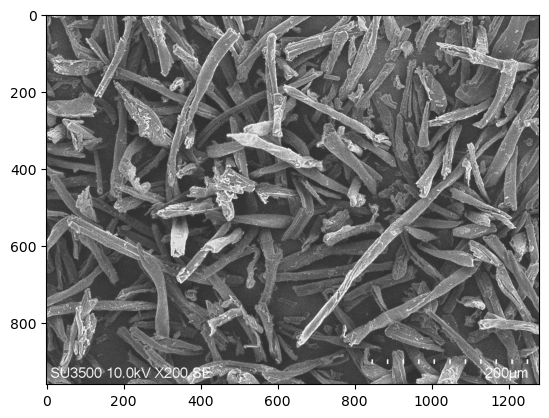

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

#LOADING AND READING IMAGE
im = io.imread("sem.jpg.jpg")
plt.imshow(im, cmap ='gray')

In [3]:
im.shape

(960, 1280, 3)

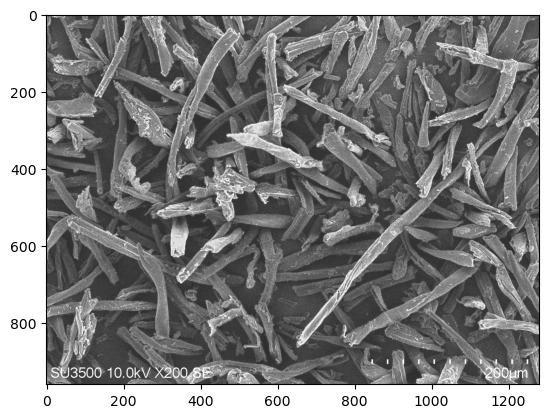

In [4]:
#Converting to grayscale
from skimage.color import rgb2gray
im1 = rgb2gray(im)
plt.imshow(im1, cmap='gray')

In [5]:
im1.shape

(960, 1280)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show(close=None, block=None)>

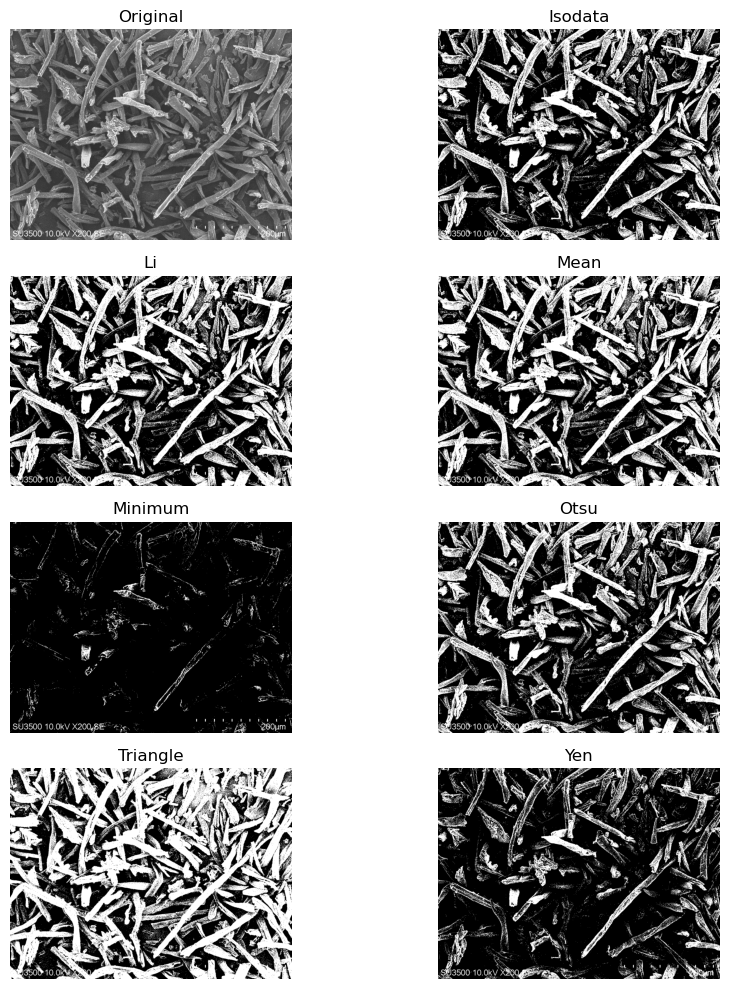

In [6]:
#Thresholding: to get the binary image
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(im1, figsize=(10, 10), verbose=True)
plt.show

In [7]:
from skimage.filters import threshold_mean
th = threshold_mean(im1)
print(th)

0.4088848134957109


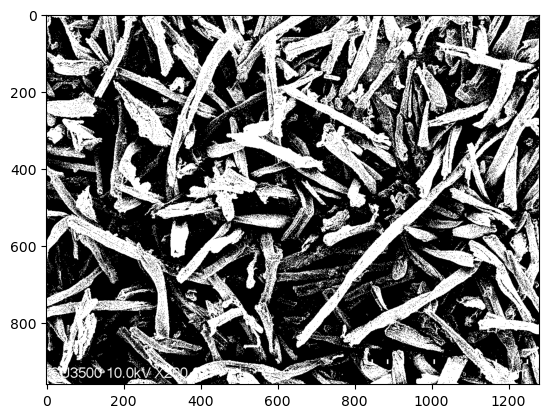

In [8]:
th_im = im1 > th
plt.imshow(th_im, cmap='gray')
     

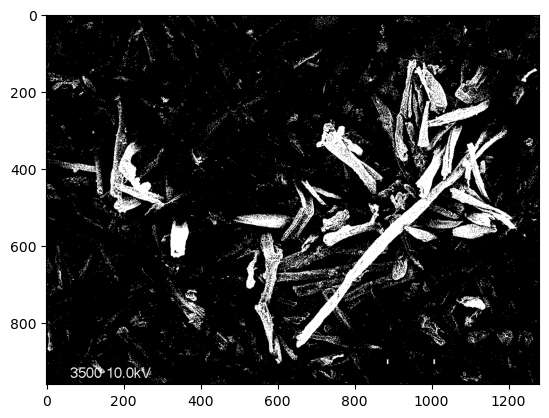

In [9]:
#PARTICLE MEASUREMNET

from skimage.segmentation import clear_border
im2= clear_border(th_im)
plt.imshow(im2, cmap='gray')

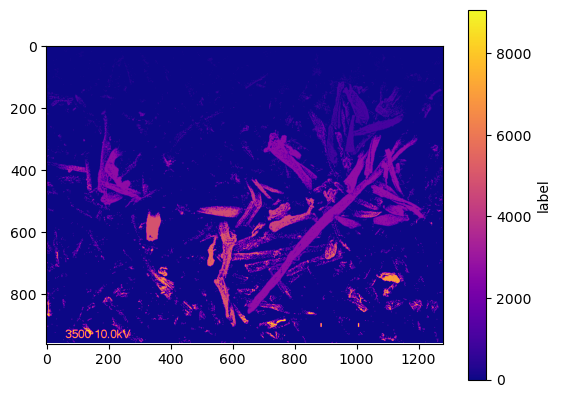

In [10]:
from skimage.measure import label
im_l = label(im2, connectivity=im2.ndim)
#cmap=plt.cm.get_cmap('plasma')
i_map =plt.imshow(im_l, cmap='plasma')
i_map_labeled=plt.colorbar(i_map).set_label('label')

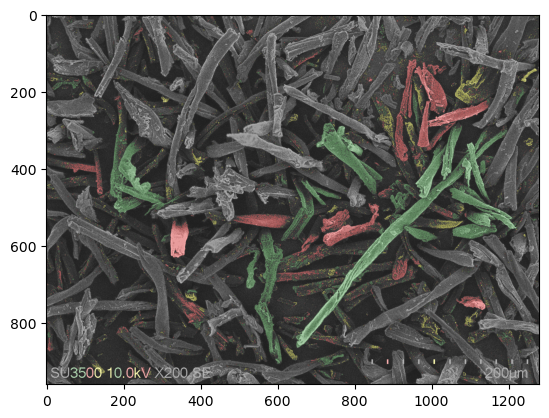

In [11]:
from skimage.color import label2rgb
# colors option is a list of 3 elements
im_ov_s = label2rgb(im_l, image=im1, colors= ['yellow','green', 'red'])
plt.imshow(im_ov_s)

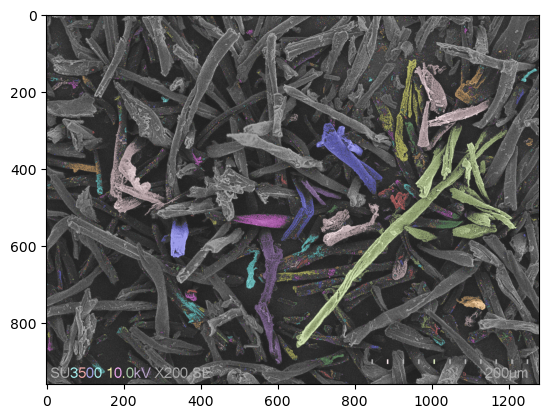

In [12]:
from skimage.color import label2rgb
import matplotlib as mpl
im_ov_s1 = label2rgb(im_l, image=im1)
plt.imsave("im_ov_s.jpg", im_ov_s1) 
plt.imshow(im_ov_s1)

In [13]:
from skimage.measure import regionprops, regionprops_table
scale = 4 #nm/pixel
props=regionprops(im_l, im1)
#for prop in all_props:
#print('Label: {} Area: {}'.format(prop.label, prop.area))


props_t = regionprops_table(im_l, im1, 
                          properties=['label','area', 'equivalent_diameter',
                                       'solidity'])

import pandas as pd
df = pd.DataFrame(props_t)
print(df)


      label  area  equivalent_diameter  solidity
0         1     6             2.763953  0.666667
1         2     1             1.128379  1.000000
2         3     1             1.128379  1.000000
3         4     1             1.128379  1.000000
4         5     1             1.128379  1.000000
...     ...   ...                  ...       ...
9062   9063     1             1.128379  1.000000
9063   9064     1             1.128379  1.000000
9064   9065     1             1.128379  1.000000
9065   9066     1             1.128379  1.000000
9066   9067     1             1.128379  1.000000

[9067 rows x 4 columns]


In [14]:
df['area_sqnm'] = df['area'] * (scale**2)
df['equivalent_diameter_nm'] = df['equivalent_diameter'] * (scale)
df

label  area  equivalent_diameter  solidity  area_sqnm  \
0         1     6             2.763953  0.666667         96   
1         2     1             1.128379  1.000000         16   
2         3     1             1.128379  1.000000         16   
3         4     1             1.128379  1.000000         16   
4         5     1             1.128379  1.000000         16   
...     ...   ...                  ...       ...        ...   
9062   9063     1             1.128379  1.000000         16   
9063   9064     1             1.128379  1.000000         16   
9064   9065     1             1.128379  1.000000         16   
9065   9066     1             1.128379  1.000000         16   
9066   9067     1             1.128379  1.000000         16   

      equivalent_diameter_nm  
0                  11.055813  
1                   4.513517  
2                   4.513517  
3                   4.513517  
4                   4.513517  
...                      ...  
9062                4.513517  
9063                4.513517  
9064                4.513517  
9065                4.513517  
9066                4.513517  

[9067 rows x 6 columns]

In [15]:
df = df[df['area'] > 100]

In [16]:
#Equivalent diameter = SqRoot{(4*Area)/pi}

df

label   area  equivalent_diameter  solidity  area_sqnm  \
785     786    201            15.997536  0.372222       3216   
962     963   3962            71.025172  0.449716      63392   
1058   1059  10394           115.039349  0.372198     166304   
1206   1207   1724            46.851521  0.358569      27584   
1227   1228    352            21.170270  0.599659       5632   
...     ...    ...                  ...       ...        ...   
8861   8862    190            15.553633  0.454545       3040   
8862   8863    103            11.451798  0.578652       1648   
8863   8864    190            15.553633  0.454545       3040   
8864   8865    190            15.553633  0.454545       3040   
8865   8866    160            14.272993  0.432432       2560   

      equivalent_diameter_nm  
785                63.990143  
962               284.100689  
1058              460.157396  
1206              187.406082  
1227               84.681079  
...                      ...  
8861               62.214534  
8862               45.807191  
8863               62.214534  
8864               62.214534  
8865               57.091972  

[73 rows x 6 columns]

In [17]:
df_final = df.reindex(columns =['label', 'area_sqnm', 'equivalent_diameter_nm', 'solidity'])
df_final

label  area_sqnm  equivalent_diameter_nm  solidity
785     786       3216               63.990143  0.372222
962     963      63392              284.100689  0.449716
1058   1059     166304              460.157396  0.372198
1206   1207      27584              187.406082  0.358569
1227   1228       5632               84.681079  0.599659
...     ...        ...                     ...       ...
8861   8862       3040               62.214534  0.454545
8862   8863       1648               45.807191  0.578652
8863   8864       3040               62.214534  0.454545
8864   8865       3040               62.214534  0.454545
8865   8866       2560               57.091972  0.432432

[73 rows x 4 columns]

In [18]:
df_final.to_csv('measure_simulated.csv')

In [19]:
import plotly.express as px
fig = px.scatter(df_final, x="label", y="equivalent_diameter_nm", color="label")
                
fig.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='equivalent_diameter_nm', ylabel='Density'>

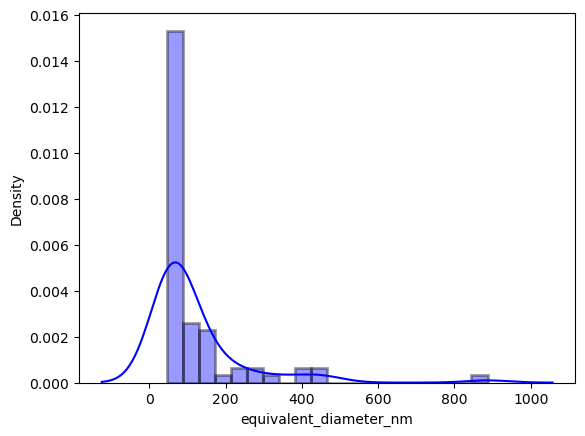

In [20]:
#Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
#Density: normalize such that the total area of the histogram equals 1

import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df_final['equivalent_diameter_nm'], color='b', bins = 20, kde = True, norm_hist=True, hist_kws = dict(edgecolor = 'k', linewidth = 2))

<AxesSubplot:xlabel='equivalent_diameter_nm', ylabel='Count'>

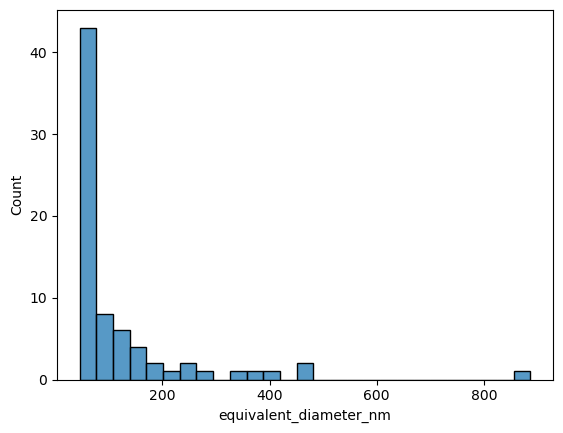

In [21]:
sns.histplot(data=df_final['equivalent_diameter_nm'] )